In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('CT Scans'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow as tf
import cv2 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from tabulate import tabulate

CT Scans\test\Covid\Covid (1).png
CT Scans\test\Covid\Covid (10).png
CT Scans\test\Covid\Covid (11).png
CT Scans\test\Covid\Covid (12).png
CT Scans\test\Covid\Covid (13).png
CT Scans\test\Covid\Covid (14).png
CT Scans\test\Covid\Covid (15).png
CT Scans\test\Covid\Covid (16).png
CT Scans\test\Covid\Covid (17).png
CT Scans\test\Covid\Covid (18).png
CT Scans\test\Covid\Covid (19).png
CT Scans\test\Covid\Covid (2).png
CT Scans\test\Covid\Covid (20).png
CT Scans\test\Covid\Covid (3).png
CT Scans\test\Covid\Covid (4).png
CT Scans\test\Covid\Covid (5).png
CT Scans\test\Covid\Covid (6).png
CT Scans\test\Covid\Covid (7).png
CT Scans\test\Covid\Covid (8).png
CT Scans\test\Covid\Covid (9).png
CT Scans\test\Normal\Non-Covid (1).png
CT Scans\test\Normal\Non-Covid (10).png
CT Scans\test\Normal\Non-Covid (11).png
CT Scans\test\Normal\Non-Covid (12).png
CT Scans\test\Normal\Non-Covid (13).png
CT Scans\test\Normal\Non-Covid (14).png
CT Scans\test\Normal\Non-Covid (15).png
CT Scans\test\Normal\Non-Covid

**MEMASTIKAN APAKAH CITRA BERHASIL DIINPUT (HANYA UNTUK MEMASTIKAN)**

Contoh Citra CT Scan Covid-19


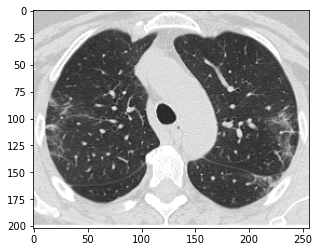

In [2]:
img = cv2.imread("CT Scans/train/Covid/Covid (1).png")
plt.imshow(img)
print('Contoh Citra CT Scan Covid-19')

Contoh Citra CT Scan Normal


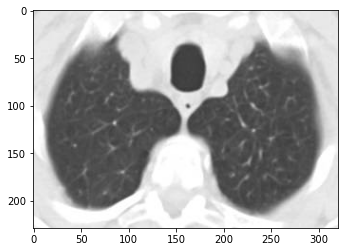

In [3]:
img = cv2.imread("CT Scans/train/Normal/Non-Covid (1).png")
plt.imshow(img)
print('Contoh Citra CT Scan Normal')

**#1 PREPROCESSING**

**PREPROCESSING CITRA LATIH**

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('CT Scans/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 100 images belonging to 2 classes.


**PREPROCESSING CITRA UJI**

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    "CT Scans/test", 
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 40 images belonging to 2 classes.


**#2 CNN**

In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**#3 PROSES TRAINING**

In [7]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
import time
start = time.time()
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 80)
print('')
print("Total time: ", time.time() - start, "seconds")

Epoch 1/80
4/4 [==============================] - 1s 168ms/step - loss: 1.0932 - accuracy: 0.4800 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 2/80
4/4 [==============================] - 1s 151ms/step - loss: 0.6868 - accuracy: 0.4800 - val_loss: 0.7106 - val_accuracy: 0.5000
Epoch 3/80
4/4 [==============================] - 0s 124ms/step - loss: 0.6832 - accuracy: 0.5000 - val_loss: 0.6700 - val_accuracy: 0.5000
Epoch 4/80
4/4 [==============================] - 1s 155ms/step - loss: 0.6639 - accuracy: 0.5100 - val_loss: 0.6523 - val_accuracy: 0.6500
Epoch 5/80
4/4 [==============================] - 1s 128ms/step - loss: 0.6569 - accuracy: 0.6600 - val_loss: 0.6210 - val_accuracy: 0.8250
Epoch 6/80
4/4 [==============================] - 1s 169ms/step - loss: 0.6199 - accuracy: 0.6800 - val_loss: 0.6048 - val_accuracy: 0.8000
Epoch 7/80
4/4 [==============================] - 0s 116ms/step - loss: 0.5856 - accuracy: 0.8400 - val_loss: 0.5574 - val_accuracy: 0.8000
Epoch 8/80
4/4 [====

4/4 [==============================] - 1s 161ms/step - loss: 0.1606 - accuracy: 0.9500 - val_loss: 0.2819 - val_accuracy: 0.9500
Epoch 60/80
4/4 [==============================] - 1s 188ms/step - loss: 0.0392 - accuracy: 0.9900 - val_loss: 0.3635 - val_accuracy: 0.9500
Epoch 61/80
4/4 [==============================] - 1s 170ms/step - loss: 0.1043 - accuracy: 0.9700 - val_loss: 0.3742 - val_accuracy: 0.9000
Epoch 62/80
4/4 [==============================] - 1s 164ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.2982 - val_accuracy: 0.9500
Epoch 63/80
4/4 [==============================] - 1s 189ms/step - loss: 0.0827 - accuracy: 0.9800 - val_loss: 0.2899 - val_accuracy: 0.9500
Epoch 64/80
4/4 [==============================] - 1s 221ms/step - loss: 0.0709 - accuracy: 0.9900 - val_loss: 0.3183 - val_accuracy: 0.9500
Epoch 65/80
4/4 [==============================] - 1s 146ms/step - loss: 0.0596 - accuracy: 0.9800 - val_loss: 0.3742 - val_accuracy: 0.9250
Epoch 66/80
4/4 [========

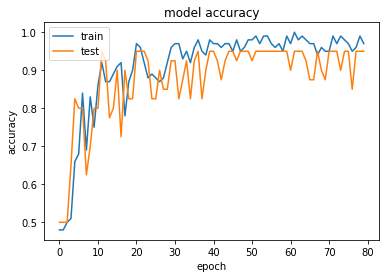

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

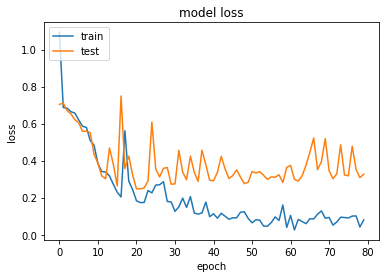

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:

meanacc = np.mean(history.history['accuracy'])
meanloss = np.mean(history.history['loss'])

percentage_meanacc = meanacc * 100
pmacc_formated = "{:.2f}".format(percentage_meanacc)
print('Rata-rata Akurasi:', pmacc_formated, '%')

percentage_meanloss = meanloss * 100
pmacc_formated = "{:.2f}".format(percentage_meanloss)
print('Rata-rata Loss:', pmacc_formated, '%')


Rata-rata Akurasi: 90.93 %
Rata-rata Loss: 20.99 %


**#4 MENENTUKAN HASIL**

In [12]:
headers = ["\x1b[1mNama File\x1b[0m", "\x1b[1mHasil Deteksi\x1b[0m", "\x1b[1mKeterangan\x1b[0m"] 
for dirname, _, filenames in os.walk('CT Scans\Test'):
    table = []
    for filename in filenames:
        citra = os.path.join(dirname, filename)
        test_image = image.load_img(citra, target_size = (64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = cnn.predict(test_image)
        training_set.class_indices

        if result[0][0] == 0:
          hasil = 'Beresiko Covid-19'
        else:
          hasil = 'Normal'

        split = filename.split()
        if split[0] == 'Covid' and hasil == 'Beresiko Covid-19':
            keterangan = '\x1b[32mBenar\x1b[0m'
        elif split[0] == 'Non-Covid' and hasil == 'Normal':
            keterangan = '\x1b[32mBenar\x1b[0m'
        else:
            keterangan = '\x1b[31mSalah\x1b[0m'
            
        table += [[filename, hasil, keterangan]]
        
    if _ == []:
        print(tabulate(table, headers, tablefmt="fancy_grid"))
        print('')


╒════════════════╤═══════════════════╤══════════════╕
│ Nama File      │ Hasil Deteksi     │ Keterangan   │
╞════════════════╪═══════════════════╪══════════════╡
│ Covid (1).png  │ Beresiko Covid-19 │ Benar        │
├────────────────┼───────────────────┼──────────────┤
│ Covid (10).png │ Beresiko Covid-19 │ Benar        │
├────────────────┼───────────────────┼──────────────┤
│ Covid (11).png │ Beresiko Covid-19 │ Benar        │
├────────────────┼───────────────────┼──────────────┤
│ Covid (12).png │ Normal            │ Salah        │
├────────────────┼───────────────────┼──────────────┤
│ Covid (13).png │ Beresiko Covid-19 │ Benar        │
├────────────────┼───────────────────┼──────────────┤
│ Covid (14).png │ Beresiko Covid-19 │ Benar        │
├────────────────┼───────────────────┼──────────────┤
│ Covid (15).png │ Beresiko Covid-19 │ Benar        │
├────────────────┼───────────────────┼──────────────┤
│ Covid (16).png │ Beresiko Covid-19 │ Benar        │
├────────────────┼──────────